## GLOBALS

**Libraries**

In [1]:
import pandas as pd
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
from matplotlib.font_manager import FontProperties

import seaborn as sns
from utils.utils import load_theme

**Dataset**

In [60]:
data = pd.read_csv('dataset/transfers_complete.csv')
original_data = data

In [3]:
data.isna().sum()

league                      0
season                      0
window                      0
team_id                     0
team_name                  52
team_country                0
dir                         0
player_id                   0
player_name                 0
player_age                 16
player_nation               5
player_nation2          54606
player_pos                  0
counter_team_id             0
counter_team_name           0
counter_team_country        0
transfer_fee_amnt       49306
market_val_amnt         19839
is_free                     0
is_loan                     0
is_loan_end                 0
is_retired                  0
transfer_id                 0
dtype: int64

**Colors**

Manual

In [52]:
league_colors = {
    'GB1': ['#6b3030', '#7f3c3c', '#995555', '#b26666', '#cc8080', '#d18888', '#db9595', '#e3a1a1', '#edadad', '#f5b8b8'],  # Rossi
    'ES1': ['#a65316', '#ad6936', '#a3602e', '#c4783f', '#d1854b', '#db9158', '#de9964', '#eba671', '#f0b07f', '#fcc092'],  # Arancioni
    'IT1': ['#f7f288', '#faf593', '#faf59d', '#faf6a5', '#f7f4b2', '#f7f5be', '#f7f5c3', '#faf7c8', '#faf8ca', '#f7f5cd'],  # Gialli
    'L1': ['#79a840', '#82b04a', '#88b354', '#8cb55b', '#98c265', '#a1cc6c', '#a9d474', '#b1db7d', '#b7e084', '#c6eb98'],  # Verdi
    'FR1': ['#4bc1db', '#55c7e0', '#67d3eb', '#83def2', '#98e4f5', '#a1e7f7', '#aaebfa', '#b3effc', '#bbf0fc', '#c4f4ff'],  # Blu
    'PO1': ['#9f68cc', '#ae76db', '#b781e3', '#c18ced', '#cc93fa', '#d19dfc', '#d0a1f7', '#d6aafa', '#d9b1fa', '#dfbbfc'],  # Viola
    'NL1': ['#b0b0b0', '#b5b5b5', '#b8b8b8', '#bdbdbd', '#bfbfbf', '#c7c7c7', '#d1d1d1', '#d4d4d4', '#d9d9d9', '#dedede']   # Grigi
}

From base color

In [54]:
def create_color_list(base_color, num_colors):
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#FFFFFF', base_color], N=num_colors)
    return [mcolors.to_hex(cmap(i / num_colors)) for i in range(num_colors)][::-1]

league_base_colors = {
    'GB1': '#cf97f0',  # Base per Viola
    'ES1': '#e08948',  # Base per Arancioni
    'IT1': '#fcf890',  # Base per Gialli
    'L1': '#8ebf52',   # Base per Verdi
    'FR1': '#8be5f7',  # Base per Blu
    'PO1': '#823b3b',  # Base per Rossi
    'NL1': '#bfbfbf'   # Base per Grigi
}

league_colors = {league: create_color_list(color, 10) for league, color in league_base_colors.items()}
#league_colors

team_colors = {}
for league, colors in league_colors.items():
    teams_in_league = data[data['league'] == league]['team_name'].unique()
    for team in teams_in_league:
        team_colors[team] = colors

## CHARTS

In [7]:
load_theme("light")

{'figure.facecolor': '#ffffff',
 'axes.facecolor': '#303030',
 'axes.edgecolor': '#171717',
 'axes.grid': True,
 'grid.color': '#555555',
 'grid.linewidth': 0.5,
 'xtick.color': '#000000',
 'ytick.color': '#000000',
 'axes.labelcolor': '#000000'}

In [9]:
data = data[data["dir"] == "in"]

### PLAYERS' NATIONALITY PER LEAGUE

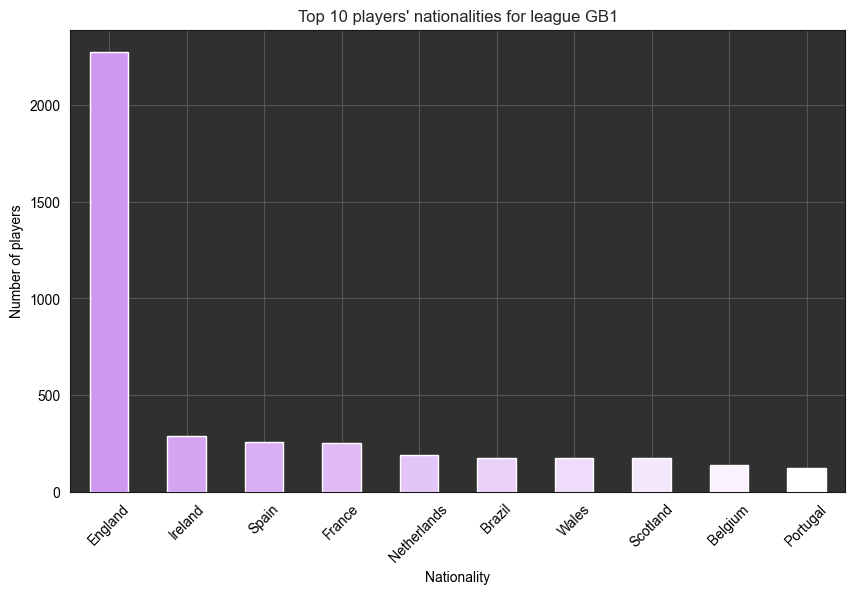

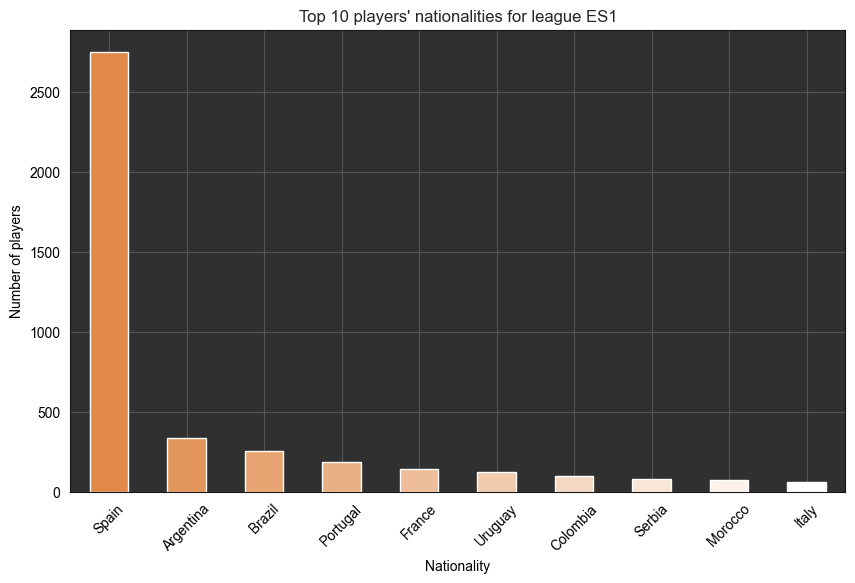

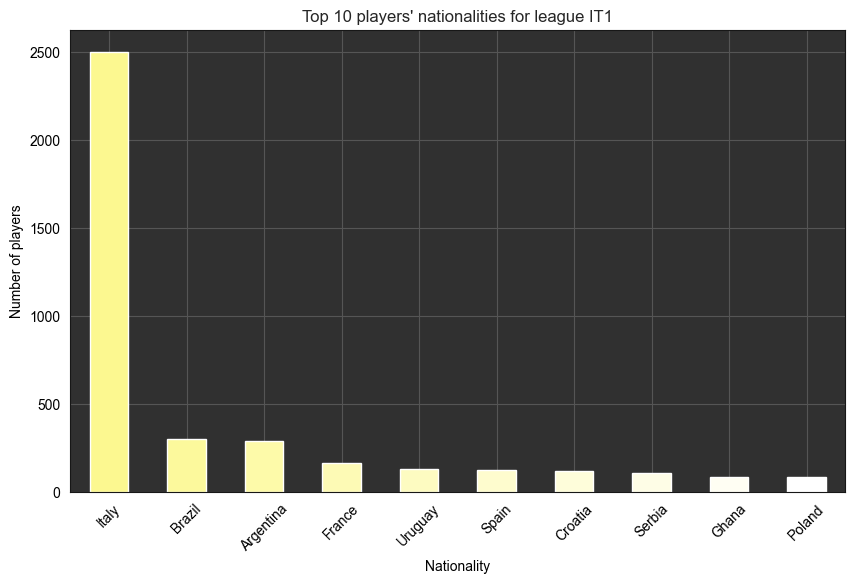

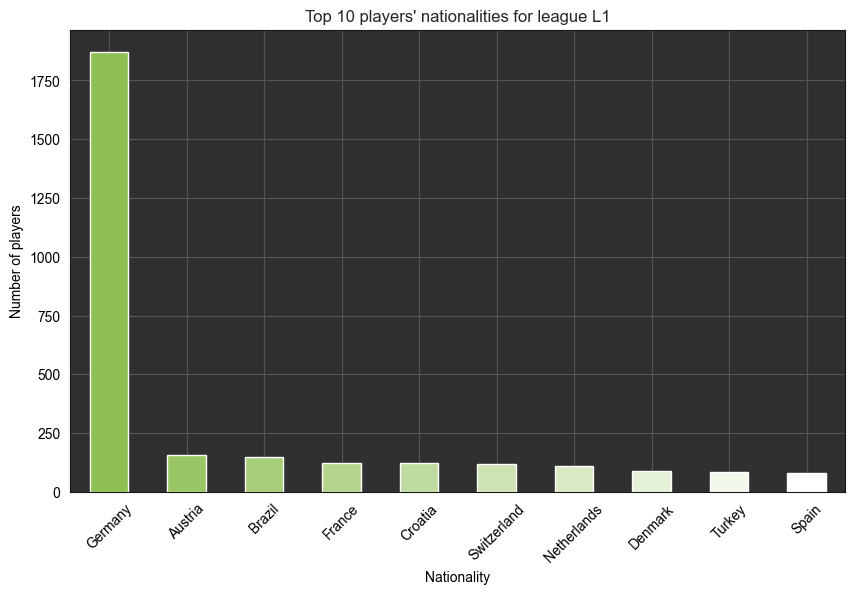

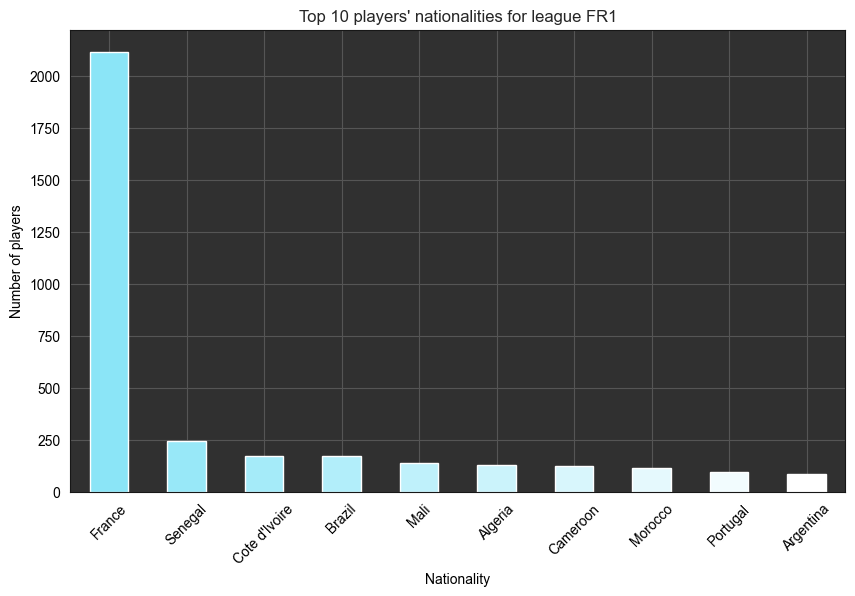

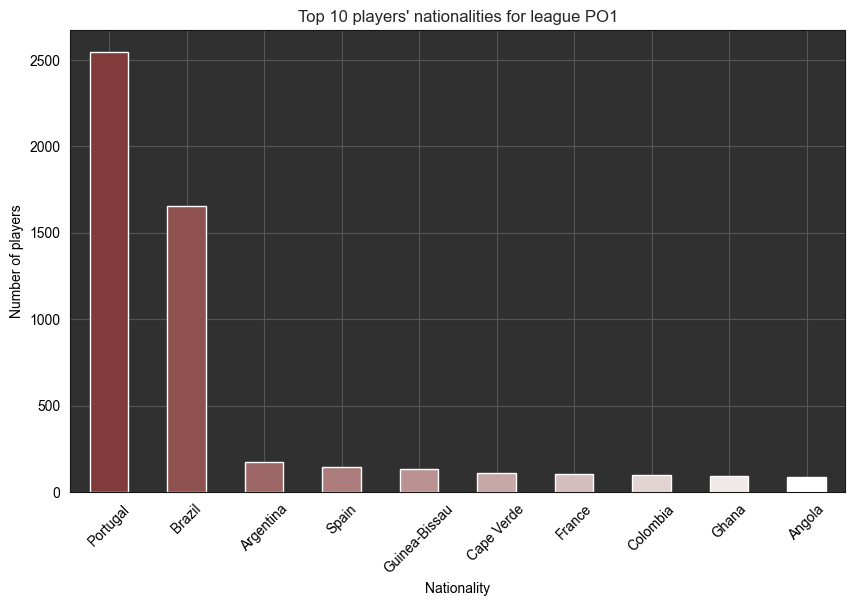

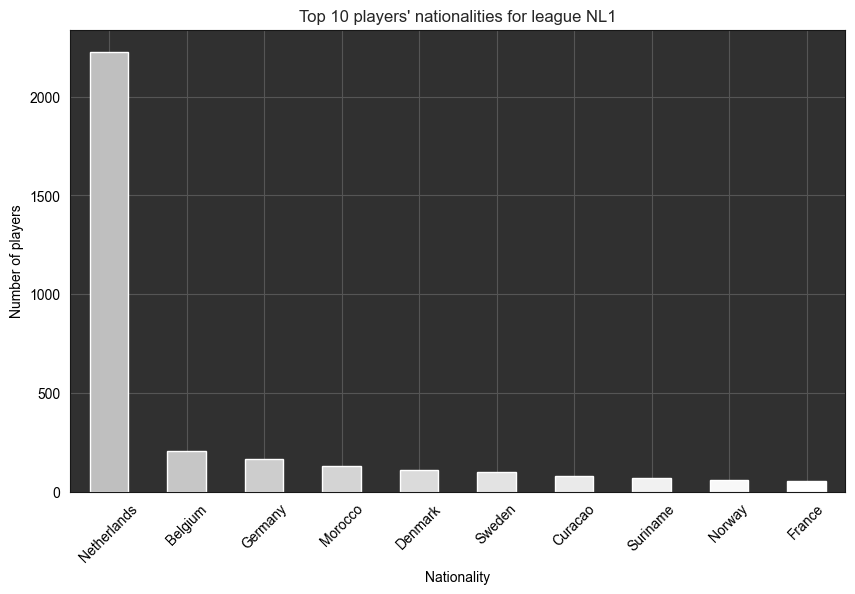

In [10]:
for x in data["league"].unique():
    data_league = data[data["league"] == x]
    nation_counts = data_league.groupby("player_nation")["player_name"].count().sort_values(ascending=False)
    top_10_nations = nation_counts.head(10)

    try:
        color = league_colors.get(x)
        plt.figure(figsize=(10, 6))
        top_10_nations.plot(kind='bar', color=color)
        plt.title(f"Top 10 players' nationalities for league {x}")
        plt.xlabel('Nationality')
        plt.ylabel('Number of players')
        plt.xticks(rotation=45)
        plt.show()

    except Exception as e:
        print(f"Plot not possible for league {x} due to {e}")

### COUNTER TEAMS FOR BEST BUYERS

In [67]:
load_theme("light")

{'figure.facecolor': '#ffffff',
 'axes.facecolor': '#303030',
 'axes.edgecolor': '#171717',
 'axes.grid': True,
 'grid.color': '#555555',
 'grid.linewidth': 0.5,
 'xtick.color': '#000000',
 'ytick.color': '#000000',
 'axes.labelcolor': '#000000'}

team_name
Genoa CFC         1276
SL Benfica        1050
Atalanta BC       1027
Parma FC          1021
Udinese Calcio     948
Sporting CP        909
SC Braga           905
FC Porto           882
Juventus FC        873
AS Roma            871
Name: player_name, dtype: int64


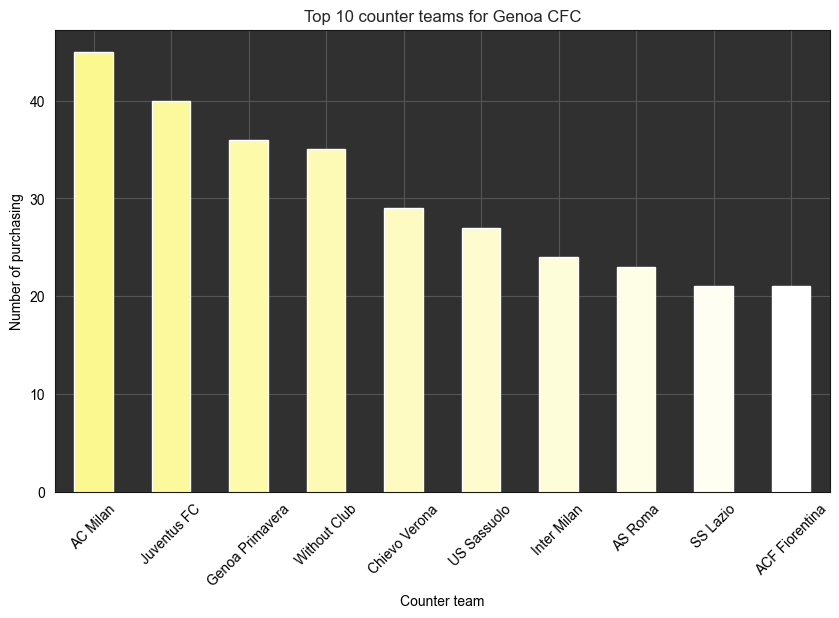

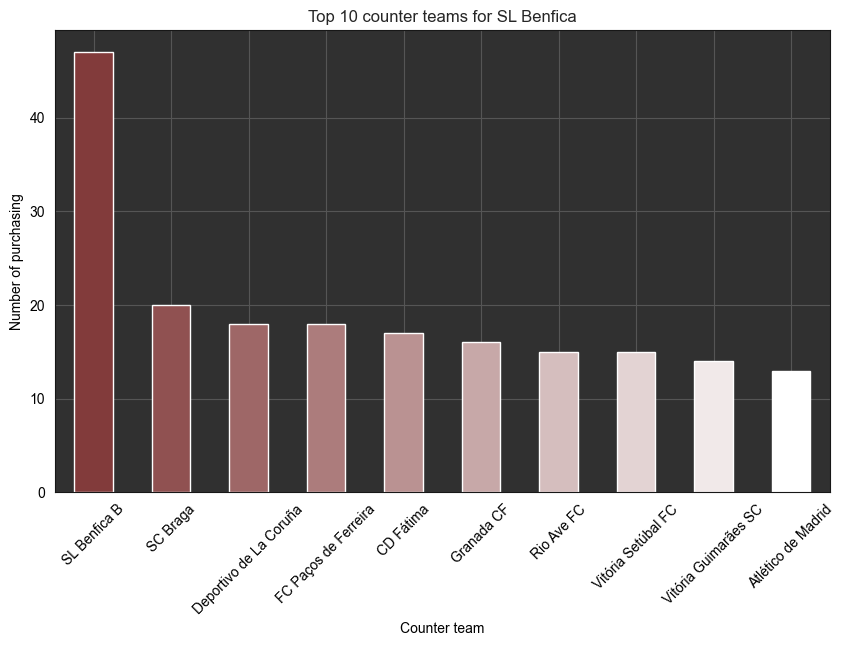

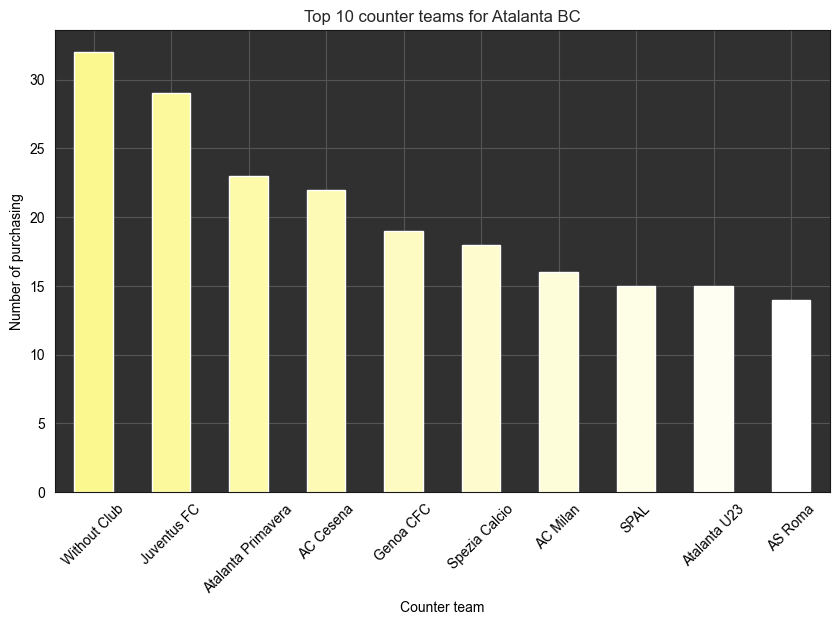

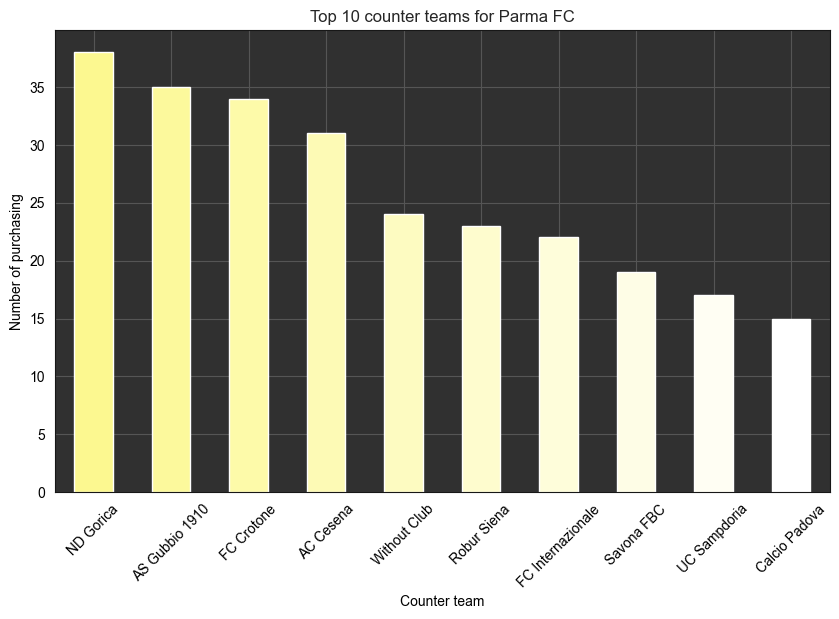

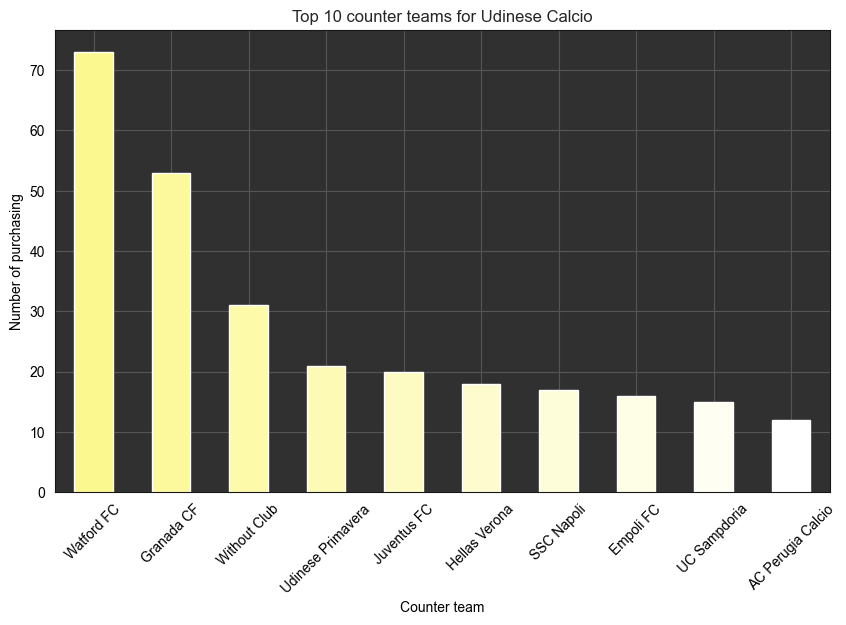

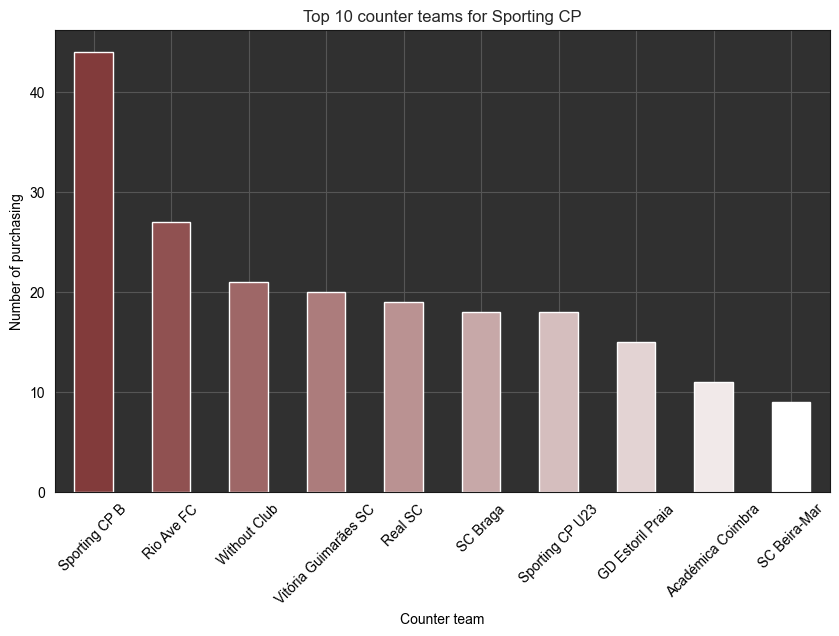

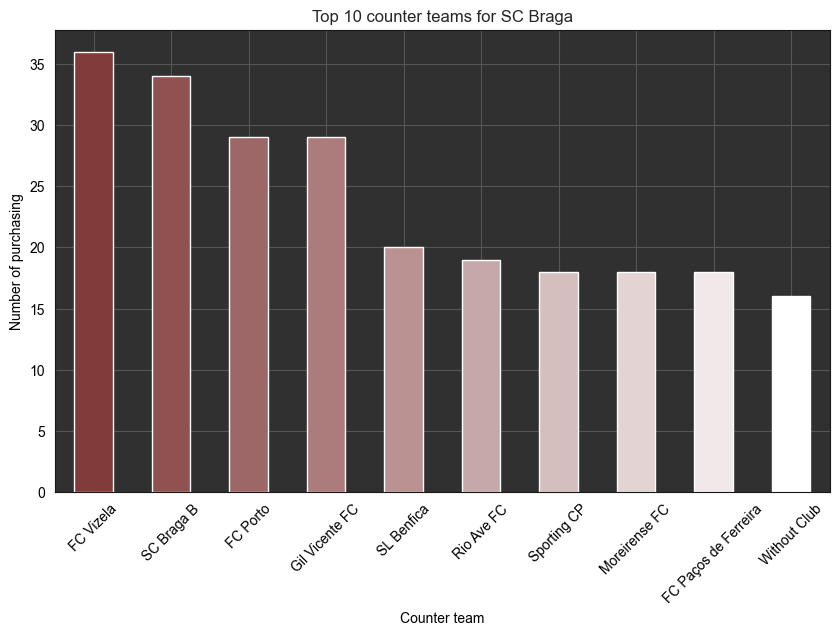

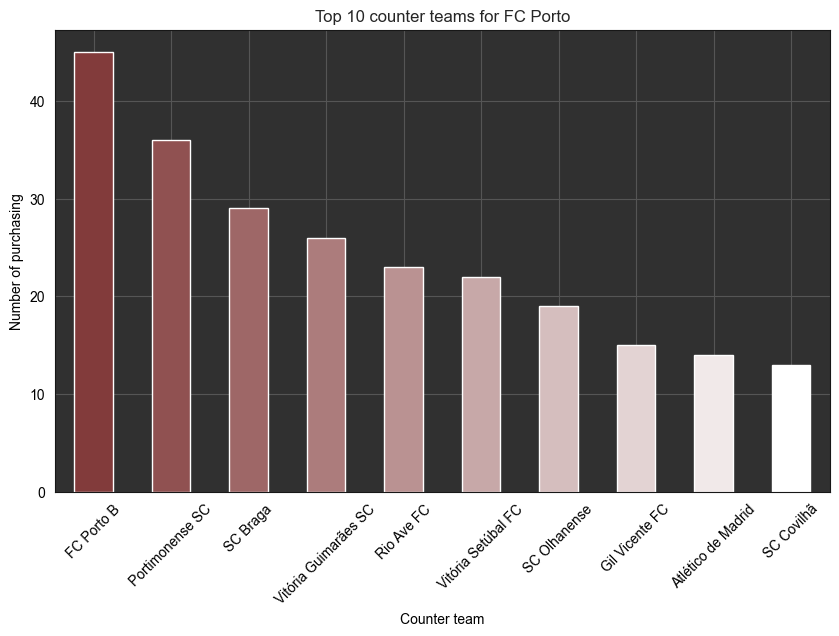

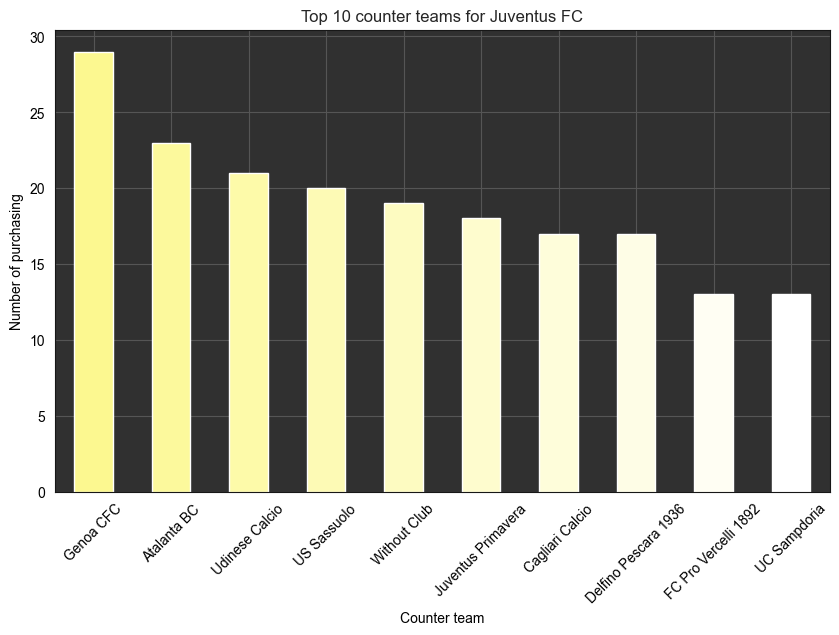

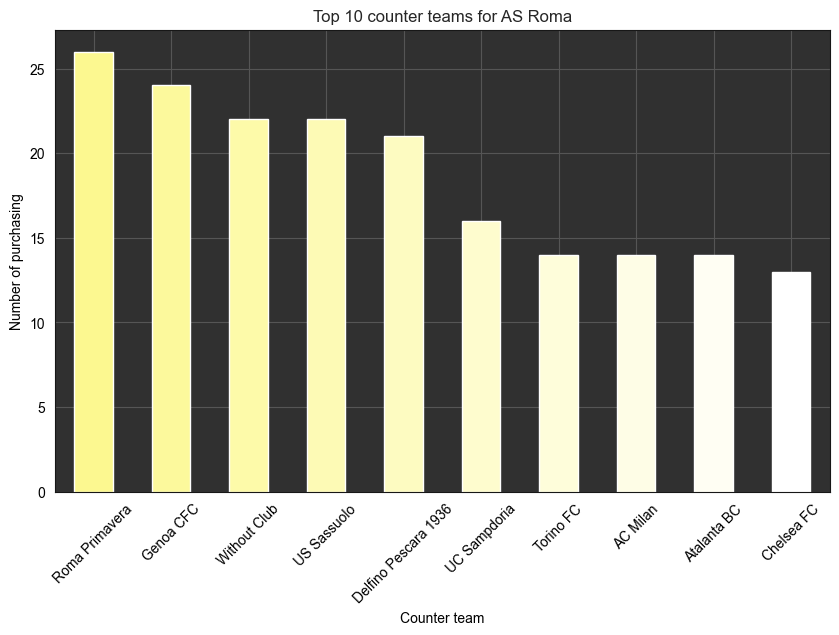

In [69]:
def plot_team(x):
    data_team = data[data["team_name"] == x]
    team_counts = data_team.groupby("counter_team_name")["player_name"].count().sort_values(ascending=False)
    top_10_counter_team = team_counts.head(10)

    color = team_colors[data_team['team_name'].iloc[0]]

    try:
        plt.figure(figsize=(10, 6))
        ax = top_10_counter_team.plot(kind='bar', color=color)
        
        plt.title(f'Top 10 counter teams for {x}')
        plt.xlabel('Counter team')
        plt.ylabel('Number of purchasing')
        plt.xticks(rotation=45)
        plt.show()
    except Exception as e:
        print(f"Plot not possible for team {x} due to {e}")


top10_team = data.groupby("team_name")["player_name"].count().sort_values(ascending=False).head(10)
print(top10_team)

for x in top10_team.keys():
    plot_team(x)

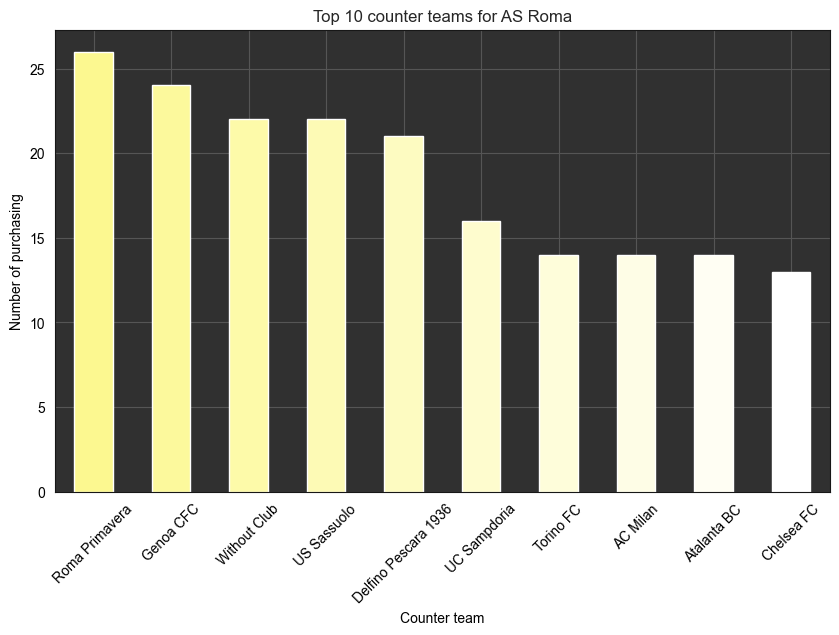

In [66]:
plot_team("AS Monaco")

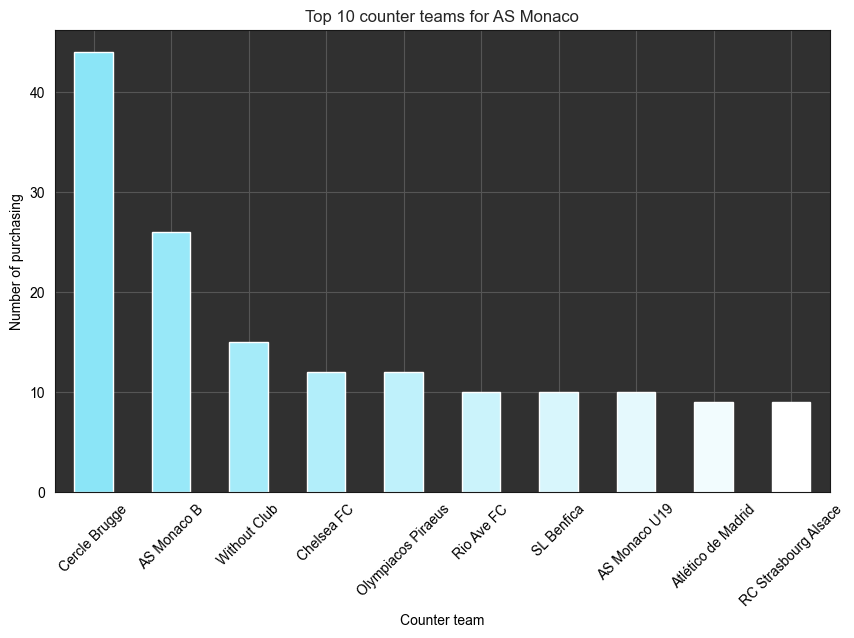

In [70]:
plot_team("AS Monaco")

### HISTORIC CAPITAL GAIN

In [13]:
data_gains = pd.read_csv("dataset\capital_gains.csv")
data_gains.drop(columns=["Unnamed: 0"], inplace=True)
data_gains.head(5)

,team_name,player_id,transfer_fee_amnt,season_left,season_ord_left,window_left,arrival_fee_amnt,season_in,season_ord_in,window_in,gain
0,Wigan Athletic,12807,1200000.0,2010,2010.2,s,2300000.0,2009.0,2009.2,s,-1100000.0
1,Manchester United,73538,0.0,2010,2010.2,s,0.0,2009.0,2009.2,s,0.0
2,Wolverhampton Wanderers,29975,1680000.0,2010,2010.2,s,1400000.0,2009.0,2009.2,s,280000.0
3,West Ham United,23197,2200000.0,2010,2010.2,s,6800000.0,2009.0,2009.2,s,-4600000.0
4,West Ham United,66109,750000.0,2010,2010.2,s,1200000.0,2009.0,2009.2,s,-450000.0


In [14]:
grouped_team_year = data_gains[["team_name", "season_left", "gain"]].groupby(['team_name', 'season_left']).sum().reset_index()
grouped_team_year

,team_name,season_left,gain
0,1. FC Köln,2016,900000.0
1,1. FC Köln,2017,250000.0
2,1. FC Köln,2019,2200000.0
3,1. FC Köln,2020,-2000000.0
4,1. FC Köln,2021,6750000.0
...,...,...,...
1518,Wolverhampton Wanderers,2018,3450000.0
1519,Wolverhampton Wanderers,2020,47410000.0
1520,Wolverhampton Wanderers,2021,-2500000.0
1521,Wolverhampton Wanderers,2022,-18950000.0


In [15]:
grouped_team_gain_amount = data_gains[["team_name", "gain"]].groupby(['team_name']).sum().reset_index().sort_values(by=["gain"], ascending=False)
grouped_team_gain_amount

,team_name,gain
164,SL Benfica,795242350.0
21,Ajax Amsterdam,708140900.0
82,FC Porto,545688000.0
36,Borussia Dortmund,501960000.0
15,AS Monaco,499120000.0
...,...,...
116,Manchester City,-67940000.0
29,Bayern Munich,-86749100.0
72,FC Barcelona,-147980000.0
117,Manchester United,-207315000.0


Best teams

In [ ]:
def create_color_list(base_color, num_colors):
    cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#FFFFFF', base_color], N=num_colors)
    return [mcolors.to_hex(cmap(i / num_colors)) for i in range(num_colors)][::-1]

In [ ]:
palette = {league: create_color_list(color, 10) for league, color in league_base_colors.items()}

def get_line_color(team, palette):
    league = original_data[original_data["team_name"] == team]["league"].values[0]
    


In [22]:
teams_palette = {league: create_color_list(color, 10) for league, color in league_base_colors.items()}
teams_palette

{'GB1': ['#cf97f0',
  '#d4a3f2',
  '#daaef3',
  '#dfbaf5',
  '#e4c5f7',
  '#ead1f8',
  '#efdcfa',
  '#f4e8fc',
  '#faf3fd',
  '#ffffff'],
 'ES1': ['#e08948',
  '#e3965c',
  '#e7a371',
  '#eab085',
  '#eebd99',
  '#f1cbae',
  '#f5d8c2',
  '#f8e5d6',
  '#fcf2eb',
  '#ffffff'],
 'IT1': ['#fcf890',
  '#fcf99c',
  '#fdfaa9',
  '#fdfab5',
  '#fdfbc1',
  '#fefcce',
  '#fefdda',
  '#fefde6',
  '#fffef3',
  '#ffffff'],
 'L1': ['#8ebf52',
  '#9bc665',
  '#a7cd78',
  '#b4d48c',
  '#c0db9f',
  '#cde3b2',
  '#d9eac5',
  '#e6f1d9',
  '#f2f8ec',
  '#ffffff'],
 'FR1': ['#8be5f7',
  '#98e8f8',
  '#a5ebf9',
  '#b2eefa',
  '#bff1fb',
  '#cbf3fb',
  '#d8f6fc',
  '#e5f9fd',
  '#f2fcfe',
  '#ffffff'],
 'PO1': ['#823b3b',
  '#905151',
  '#9e6767',
  '#ac7c7c',
  '#ba9292',
  '#c7a8a8',
  '#d5bebe',
  '#e3d3d3',
  '#f1e9e9',
  '#ffffff'],
 'NL1': ['#bfbfbf',
  '#c6c6c6',
  '#cdcdcd',
  '#d4d4d4',
  '#dbdbdb',
  '#e3e3e3',
  '#eaeaea',
  '#f1f1f1',
  '#f8f8f8',
  '#ffffff']}

In [18]:
league_colors.get("GB1")[0]

'#cf97f0'

In [20]:
top_n_teams = list(grouped_team_gain_amount["team_name"][:5].values)
teams = [original_data[original_data["team_name"] == team]["league"].values[0] for team in top_n_teams]
teams

['PO1', 'NL1', 'PO1', 'L1', 'FR1']

In [35]:
def get_colors(teams: list, palette: list, differentiate:int = 1):
    team_colors = []
    for i in range(0, len(teams)):
        flag = True
        j = 0
        while flag:
            color = palette.get(teams[i])[j]
            if color not in team_colors:
                team_colors.append(color)
                flag = False
            else:
                j += differentiate

    return team_colors

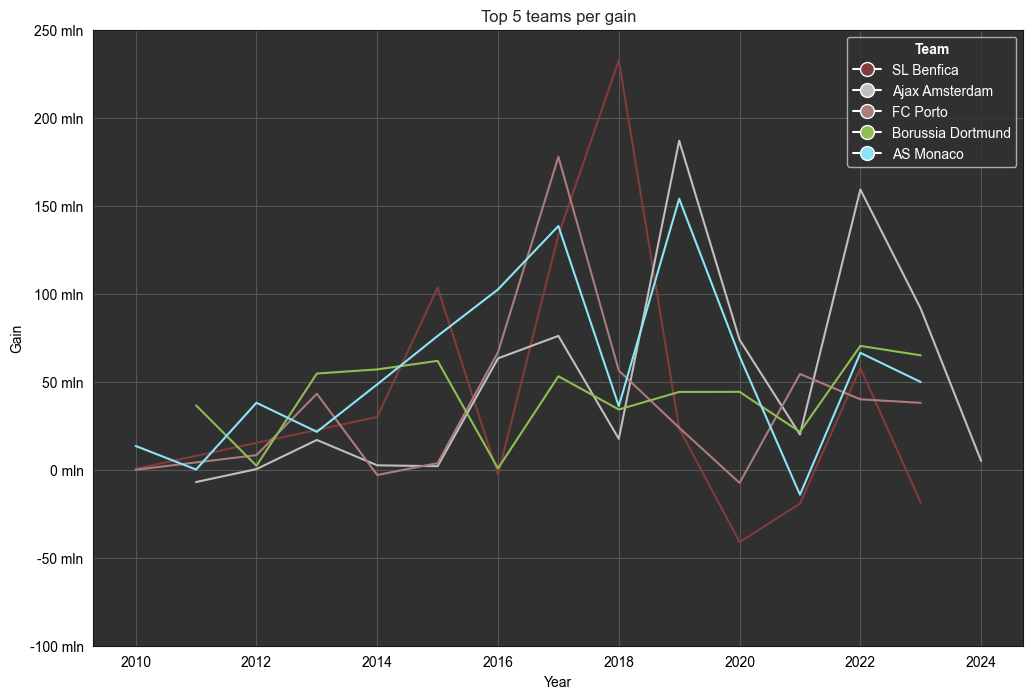

In [38]:
n_teams = 5
years = np.unique(grouped_team_year["season_left"].values)

top_n_teams = list(grouped_team_gain_amount["team_name"][:n_teams].values)
teams = [original_data[original_data["team_name"] == team]["league"].values[0] for team in top_n_teams]

df_temp = grouped_team_year[grouped_team_year["team_name"].isin(top_n_teams)]
team_colors = get_colors(teams, teams_palette, differentiate=3)

plt.figure(figsize=(12, 8))
sns.lineplot(df_temp, x='season_left', y='gain', hue='team_name', palette=team_colors) #, marker='o', markersize=3
plt.title(f"Top {n_teams} teams per gain")
plt.xlabel("Year")
plt.ylabel("Gain")

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in team_colors]
legend = plt.legend(handles=legend_elements, title="Team", loc='upper right', labels=top_n_teams)
plt.setp(legend.get_texts(), color='white')
legend.get_title().set_color('white')
font = FontProperties()
font.set_weight('bold')
legend.get_title().set_font_properties(font)

ax = plt.gca()
ticks = ax.get_yticks()
plt.yticks(ticks, [str(int(tick/1000000))+" mln" for tick in ticks])
plt.show()

Worst teams

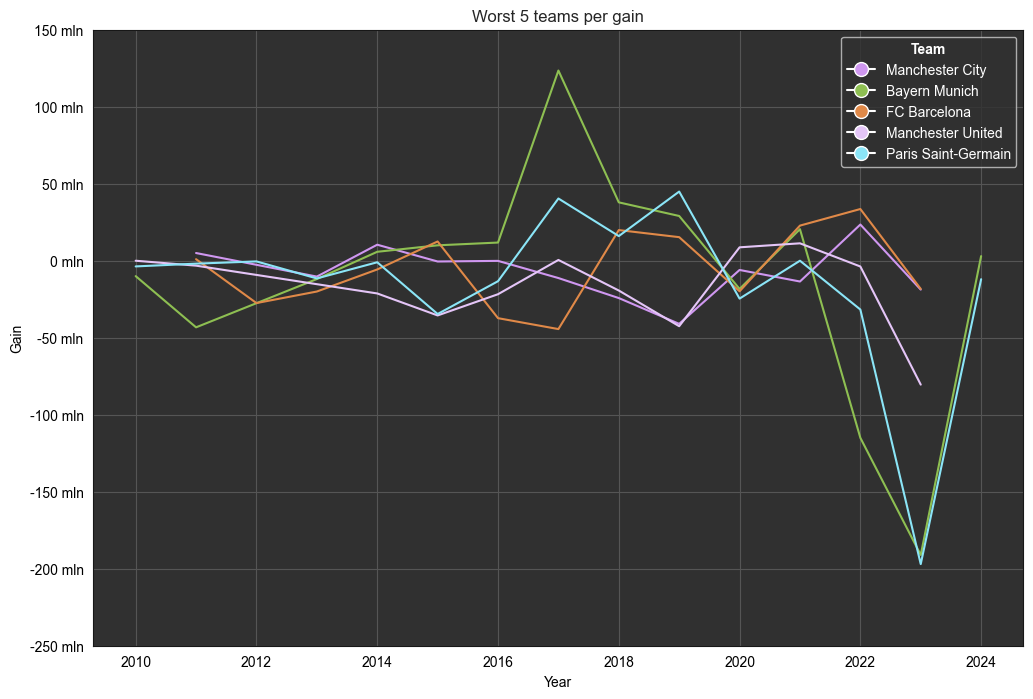

In [41]:
n_teams = 5
years = np.unique(grouped_team_year["season_left"].values)

top_n_teams = list(grouped_team_gain_amount["team_name"][-n_teams:].values)
teams = [original_data[original_data["team_name"] == team]["league"].values[0] for team in top_n_teams]

df_temp = grouped_team_year[grouped_team_year["team_name"].isin(top_n_teams)]
team_colors = get_colors(teams, teams_palette, differentiate=4)

plt.figure(figsize=(12, 8))
sns.lineplot(df_temp, x='season_left', y='gain', hue='team_name', palette=team_colors) #, marker='o', markersize=3
plt.title(f"Worst {n_teams} teams per gain")
plt.xlabel("Year")
plt.ylabel("Gain")

legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in team_colors]
legend = plt.legend(handles=legend_elements, title="Team", loc='upper right', labels=top_n_teams)
plt.setp(legend.get_texts(), color='white')
legend.get_title().set_color('white')
font = FontProperties()
font.set_weight('bold')
legend.get_title().set_font_properties(font)

ax = plt.gca()
ticks = ax.get_yticks()
plt.yticks(ticks, [str(int(tick/1000000))+" mln" for tick in ticks])
plt.show()

### FREE TANSFERS PER YEAR

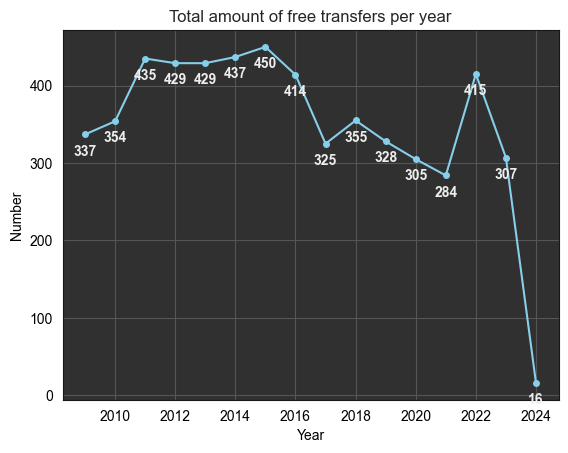

In [42]:
free_transf = original_data[(original_data["is_free"]==True)&(original_data["dir"]=="in")]
dict_ft = {}
for year in free_transf["season"].unique():
    year_par = free_transf[free_transf["season"]==year]
    #print(f"Amount of free transfers in {year}:", year_par["player_name"].count())
    dict_ft[year] = year_par["player_name"].count()

years = sorted(dict_ft.keys())
numbers = [dict_ft[year] for year in years]
    
plt.plot(years, numbers, color="skyblue", marker='o', markersize=4)
plt.title('Total amount of free transfers per year')
plt.xlabel('Year')
plt.ylabel('Number')

for year, num in zip(years, numbers):
    plt.annotate(str(num), xy=(year, num), textcoords="offset points", xytext=(0, -15), ha='center', color="#ededed", fontweight='bold')

plt.show()

**Agents' count**

In [2]:
agents = pd.read_csv(r'dataset/transfers_with_agents.csv')
agents = agents[agents["counter_team_name"] != "Without Club"]
agents.head(5)

,league,season,window,team_id,team_name,team_country,dir,player_id,player_name,player_age,...,counter_team_name,counter_team_country,transfer_fee_amnt,market_val_amnt,is_free,is_loan,is_loan_end,is_retired,transfer_id,agent
0,GB1,2009,s,985,Manchester United,England,in,33544,Antonio Valencia,23.0,...,Wigan Athletic,England,18800000.0,NaN,False,False,False,False,310832,JP PACHON SPORTS
1,GB1,2009,s,985,Manchester United,England,in,62049,Mame Diouf,21.0,...,Molde FK,Norway,4500000.0,1600000.0,False,False,False,False,319841,Amin Sakman
2,GB1,2009,s,985,Manchester United,England,in,43261,Gabriel Obertan,20.0,...,FC Girondins Bordeaux,France,4000000.0,400000.0,False,False,False,False,315185,JL Sport Consulting
3,GB1,2009,s,985,Manchester United,England,in,73538,Scott Moffatt,18.0,...,Manchester United U18,England,NaN,NaN,False,False,False,False,339015,no_agent
4,GB1,2009,s,985,Manchester United,England,left,8198,Cristiano Ronaldo,24.0,...,Real Madrid,Spain,94000000.0,45000000.0,False,False,False,False,308498,Gestifute


In [3]:
transactions = agents['agent'].value_counts().reset_index()
transactions.head(5)

,agent,count
0,no_agent,7179
1,Wasserman,534
2,CAA Stellar,415
3,Unique Sports Group,322
4,Gestifute,261


In [4]:
players = agents[['agent', 'player_id']].drop_duplicates()['agent'].value_counts().reset_index()
players.head(5)

,agent,count
0,no_agent,4194
1,Wasserman,254
2,CAA Stellar,189
3,Unique Sports Group,141
4,CAA Base Ltd,113


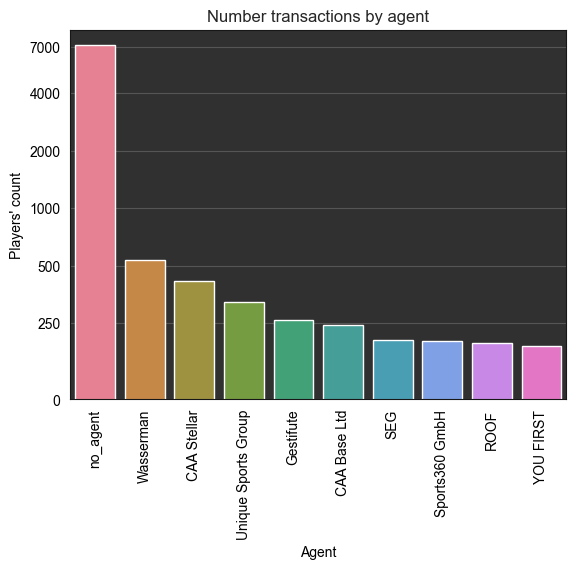

In [6]:
load_theme("light")

sns.barplot(transactions.head(10), x='agent', y='count', palette='husl', hue='agent')
plt.title(f"Number transactions by agent")
plt.yscale('log')
#plt.ylim(1, 15000)
plt.xlabel("Agent")
plt.ylabel("Players' count")
plt.xticks(rotation=90)
plt.yticks([100, 250, 500, 1000, 2000, 4000, 7000], [0, 250, 500, 1000, 2000, 4000, 7000])
plt.show()

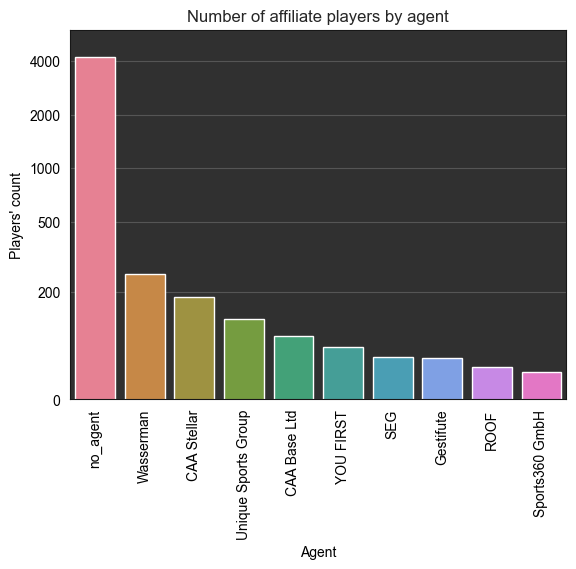

In [14]:
load_theme("light")

sns.barplot(players.head(10), x='agent', y='count', palette='husl', hue='agent')
plt.title(f"Number of affiliate players by agent")
plt.yscale('log')
#plt.ylim(1, 15000)
plt.xlabel("Agent")
plt.ylabel("Players' count")
plt.xticks(rotation=90)
plt.yticks([50, 200, 500, 1000, 2000, 4000, 6000], [0, 200, 500, 1000, 2000, 4000, None])
plt.show()